# ME 7160 Project


### Solution to ODE via FFT method:

#### Following linear equation was solved as a verification of the method

**$\ddot{x} + \dot{x} + x = cos(2t)$**

Since method of harmonic balance is valid for steady state response the particular solution to the above problem was also plotted to compare with the numerical results:

**$X_p = \frac{2}{13}sin(2t)-\frac{3}{13}cos(2t)$**

Optimization terminated successfully.
         Current function value: 0.000017
         Iterations: 56
         Function evaluations: 4732
         Gradient evaluations: 91
Values of x after optimization:
[-0.23135138 -0.18584136 -0.12869082 -0.06349073  0.00566213  0.07442264
  0.13847032  0.19378083  0.23687881  0.26505623  0.27654263  0.27061626
  0.2476495   0.20908544  0.15734719  0.09568567  0.0279753  -0.04152944
 -0.10846131 -0.16861472 -0.21821002 -0.25413096 -0.27412048 -0.27692258
 -0.26236118 -0.23135124 -0.18584122 -0.12869068 -0.06349061  0.00566225
  0.07442275  0.13847042  0.19378092  0.23687888  0.26505629  0.27654267
  0.27061628  0.24764951  0.20908543  0.15734716  0.09568563  0.02797523
 -0.04152952 -0.1084614  -0.16861483 -0.21821014 -0.25413108 -0.27412061
 -0.27692272 -0.26236132]


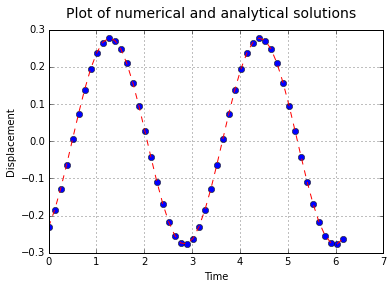

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 51 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.0000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot(t, sol.x, 'bo') #FFT solution plot
plt.plot(t, (2/13)*np.sin(2*t) - (3/13)*np.cos(2*t), 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')

plt.grid()
plt.show()

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $\omega$, $\beta$ are the unknowns and will be solved for using least square fitting

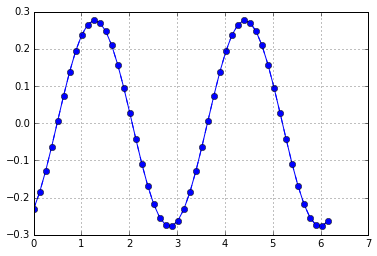

Coefficient values listed below
[ -5.82106600e-04  -7.49559741e-08   1.48523052e-08   2.77350095e-01
   6.66666670e-01   1.24319841e+00]


In [8]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta) + A3*np.cos(3*omega*t + 3*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[4]*t + p[5]) + p[2]*np.cos(2*p[4]*t + 2*p[5]) + p[3]*np.cos(3*p[4]*t + 3*p[5])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, peval(t, plsq[0]), 'b--')
plt.plot(t, sol.x, '-o')

plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

### From the least square approach it is evident that $A_1$ and $A_3$ pretty much zero. Therefore solution for $x$ takes form seen below.

### Here $\omega = 0.667$ and $\beta = 1.24$

In [9]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 2))
A2=sp.nsimplify(round(coeff[2], 2))
A3=sp.nsimplify(round(coeff[3], 2))
omega=sp.nsimplify(round(coeff[4], 2))
beta=sp.nsimplify(round(coeff[5], 2))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta) + A3*sp.cos(3*omega*time + 3*beta)
ans

     ⎛201⋅t   93⎞
7⋅cos⎜───── + ──⎟
     ⎝ 100    25⎠
─────────────────
        25       